In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
from libsvm.svm import *
from libsvm.svmutil import *
import matplotlib.pyplot as plt
import time

In [23]:
#file path
train='train_set.csv'
test='test_set.csv'

In [24]:
#data taken from file
data=np.genfromtxt(train,delimiter=',')
#req_data=[x for x in data if x[25] in [2,9]]
#data=np.array(req_data)

In [26]:
xdata=data[:,:25]
tdata=data[:,25:].flatten()
#xdata=data[:,:10]

#tdata=tdata.reshape(tdata.shape[0],1)

In [28]:
xdata.shape

(8000, 25)

In [30]:
tdata.shape

(8000,)

In [31]:
xdata

array([[ 0.24107148, -0.38227479, -0.07139491, ..., -1.33865576,
        -0.4627335 ,  1.05786105],
       [ 1.00980349, -1.75657398, -3.7792127 , ..., -0.34001209,
        -0.2208465 , -1.0028987 ],
       [ 0.54448219,  2.54921917, -1.0338692 , ...,  1.29435466,
        -0.04155238, -1.04094634],
       ...,
       [ 4.0983568 , -0.0963368 , -1.04519819, ..., -0.10832617,
         0.49252568,  0.25580047],
       [ 2.82573038, -3.72964372, -2.37696384, ...,  0.45709718,
        -0.22120791,  0.61247416],
       [ 0.6795509 , -0.36761633,  1.39119085, ...,  0.8303328 ,
         0.3672607 , -0.7907193 ]])

In [32]:
tdata

array([2., 3., 8., ..., 0., 5., 2.])

In [35]:

model = svm_train(tdata, xdata)

start_time = time.time()
p_labs, p_acc, p_vals = svm_predict(tdata, xdata, model )
print("--- %s seconds ---" % (time.time() - start_time))

Accuracy = 99.075% (7926/8000) (classification)
--- 0.9549069404602051 seconds ---


2
Accuracy = 96.525% (3861/4000) (classification)
Accuracy = 96.475% (3859/4000) (classification)
96.5
3
Accuracy = 96.3991% (2570/2666) (classification)
Accuracy = 96.4366% (2571/2666) (classification)
Accuracy = 96.3616% (2569/2666) (classification)
96.39909977494374
4
Accuracy = 96.5% (1930/2000) (classification)
Accuracy = 96.45% (1929/2000) (classification)
Accuracy = 96.45% (1929/2000) (classification)
Accuracy = 96.45% (1929/2000) (classification)
96.46249999999999
5
Accuracy = 96.9375% (1551/1600) (classification)
Accuracy = 96.875% (1550/1600) (classification)
Accuracy = 96.75% (1548/1600) (classification)
Accuracy = 96.6875% (1547/1600) (classification)
Accuracy = 96.8125% (1549/1600) (classification)
96.8125
6
Accuracy = 97.0743% (1294/1333) (classification)
Accuracy = 97.0743% (1294/1333) (classification)
Accuracy = 97.0743% (1294/1333) (classification)
Accuracy = 97.1493% (1295/1333) (classification)
Accuracy = 97.1493% (1295/1333) (classification)
Accuracy = 97.1493% (129

Accuracy = 95.7245% (403/421) (classification)
Accuracy = 95.962% (404/421) (classification)
Accuracy = 95.962% (404/421) (classification)
Accuracy = 95.962% (404/421) (classification)
Accuracy = 95.4869% (402/421) (classification)
Accuracy = 95.2494% (401/421) (classification)
Accuracy = 95.2494% (401/421) (classification)
Accuracy = 95.7245% (403/421) (classification)
Accuracy = 95.7245% (403/421) (classification)
Accuracy = 96.1995% (405/421) (classification)
Accuracy = 96.6746% (407/421) (classification)
Accuracy = 96.6746% (407/421) (classification)
Accuracy = 97.1496% (409/421) (classification)
Accuracy = 97.3872% (410/421) (classification)
Accuracy = 97.3872% (410/421) (classification)
Accuracy = 97.3872% (410/421) (classification)
Accuracy = 97.1496% (409/421) (classification)
Accuracy = 97.1496% (409/421) (classification)
Accuracy = 97.1496% (409/421) (classification)
96.38704838104763
20
Accuracy = 96.25% (385/400) (classification)
Accuracy = 95.75% (383/400) (classification)

/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


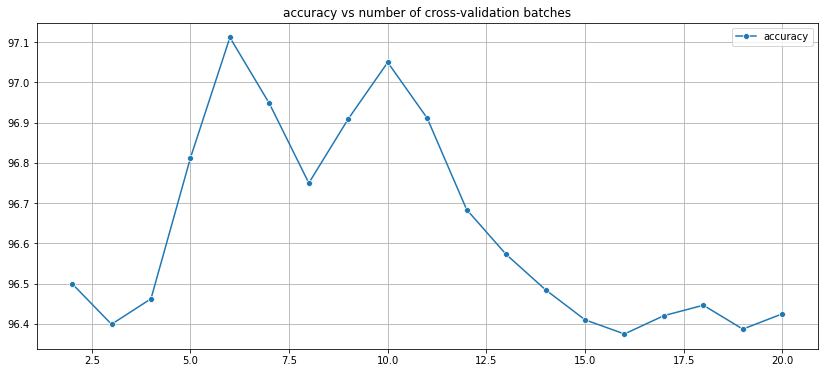

In [36]:
err=[]
min_lim=2
max_lim=21
for k in range(min_lim,max_lim):
    #k batch cross val (k taken to be 6 gives good result)
    data_points_total=xdata.shape[0]
    val_set_size=int(data_points_total/k)
    train_set_size=data_points_total-val_set_size
    accuracy=[]
    print(k)
    for val_step in range(k):
        test_begin_index=k*val_step
        test_end_index=min(test_begin_index+val_set_size,data_points_total)
        xtrain=np.append(xdata[:test_begin_index][:],xdata[test_end_index:][:])
        ttrain=np.append(tdata[:test_begin_index],tdata[test_end_index:])
        r=ttrain.shape[0]
        c=int(xtrain.shape[0]/r)
        xtrain=xtrain.reshape(r,c)
        xvalid=xdata[test_begin_index:test_end_index]
        tvalid=tdata[test_begin_index:test_end_index]
        #print(xvalid.shape,xtrain.shape)
        #print(tvalid)
        model = svm_train(ttrain, xtrain)
        p_labs, p_acc, p_vals = svm_predict(tvalid, xvalid, model )
        accuracy.append(p_acc[0])
    print(np.mean(accuracy))
    err.append(np.mean(accuracy))
#best fit poly after cross_validation
xp=[i for i in range(min_lim,max_lim)]
plt.figure(figsize=(14,6))
sns.lineplot(xp,err,marker='o',label='accuracy')
plt.title('accuracy vs number of cross-validation batches')
plt.grid(True)
plt.show()

In [46]:
#12 batch cross val 
data_points_total=xdata.shape[0]
k=6
val_set_size=int(data_points_total/k)
train_set_size=data_points_total-val_set_size
accuracy=[]
for val_step in range(k):
    test_begin_index=k*val_step
    test_end_index=min(test_begin_index+val_set_size,data_points_total)
    xtrain=np.append(xdata[:test_begin_index][:],xdata[test_end_index:][:])
    ttrain=np.append(tdata[:test_begin_index],tdata[test_end_index:])
    r=ttrain.shape[0]
    c=int(xtrain.shape[0]/r)
    xtrain=xtrain.reshape(r,c)
    xvalid=xdata[test_begin_index:test_end_index]
    tvalid=tdata[test_begin_index:test_end_index]
    #print(xvalid.shape,xtrain.shape)
    #print(tvalid)
    model = svm_train(ttrain, xtrain,'-t 2 -d 1'  )
    start_time = time.time()
    p_labs, p_acc, p_vals = svm_predict(tvalid, xvalid, model )
    print("--- %s seconds ---" % (time.time() - start_time))
    accuracy.append(p_acc[0])

print('Number of batches',k)
#print('Number of features are', 10)
#print('gamma value is',2)
print('final accuracy',np.mean(accuracy))

Accuracy = 97.0743% (1294/1333) (classification)
--- 0.14603090286254883 seconds ---
Accuracy = 97.0743% (1294/1333) (classification)
--- 0.14842820167541504 seconds ---
Accuracy = 97.0743% (1294/1333) (classification)
--- 0.1480402946472168 seconds ---
Accuracy = 97.1493% (1295/1333) (classification)
--- 0.14728808403015137 seconds ---
Accuracy = 97.1493% (1295/1333) (classification)
--- 0.14810585975646973 seconds ---
Accuracy = 97.1493% (1295/1333) (classification)
--- 0.14809417724609375 seconds ---
Number of batches 6
final accuracy 97.11177794448612


In [47]:
p_labs

[6.0,
 1.0,
 8.0,
 5.0,
 5.0,
 7.0,
 5.0,
 4.0,
 4.0,
 2.0,
 0.0,
 4.0,
 9.0,
 0.0,
 9.0,
 9.0,
 0.0,
 5.0,
 6.0,
 7.0,
 2.0,
 8.0,
 5.0,
 6.0,
 5.0,
 4.0,
 1.0,
 9.0,
 1.0,
 2.0,
 4.0,
 5.0,
 0.0,
 0.0,
 6.0,
 8.0,
 4.0,
 5.0,
 0.0,
 9.0,
 0.0,
 2.0,
 5.0,
 7.0,
 5.0,
 2.0,
 9.0,
 7.0,
 1.0,
 9.0,
 7.0,
 8.0,
 9.0,
 3.0,
 6.0,
 3.0,
 7.0,
 4.0,
 9.0,
 8.0,
 4.0,
 7.0,
 4.0,
 8.0,
 9.0,
 4.0,
 9.0,
 1.0,
 1.0,
 4.0,
 3.0,
 9.0,
 4.0,
 7.0,
 7.0,
 0.0,
 6.0,
 8.0,
 4.0,
 8.0,
 7.0,
 0.0,
 8.0,
 9.0,
 9.0,
 2.0,
 6.0,
 2.0,
 1.0,
 9.0,
 6.0,
 5.0,
 5.0,
 2.0,
 7.0,
 3.0,
 8.0,
 7.0,
 4.0,
 9.0,
 6.0,
 2.0,
 6.0,
 9.0,
 9.0,
 1.0,
 0.0,
 6.0,
 9.0,
 8.0,
 4.0,
 9.0,
 1.0,
 9.0,
 6.0,
 0.0,
 3.0,
 3.0,
 8.0,
 8.0,
 8.0,
 1.0,
 4.0,
 4.0,
 6.0,
 3.0,
 8.0,
 1.0,
 4.0,
 2.0,
 6.0,
 0.0,
 1.0,
 7.0,
 3.0,
 9.0,
 4.0,
 7.0,
 1.0,
 3.0,
 0.0,
 8.0,
 4.0,
 0.0,
 3.0,
 9.0,
 2.0,
 8.0,
 1.0,
 0.0,
 1.0,
 6.0,
 5.0,
 3.0,
 2.0,
 9.0,
 2.0,
 4.0,
 9.0,
 8.0,
 5.0,
 7.0,
 7.0,
 6.0,
 9.0,
 9.0,
 5.0

In [48]:
data=np.genfromtxt(test,delimiter=',')

In [49]:
xdata=data[:,:25]

In [51]:
xdata.shape

(2000, 25)

In [53]:
tdata=tdata[:2000]

In [54]:
tdata.shape

(2000,)

In [55]:
p_labs, p_acc, p_vals = svm_predict(tdata, xdata, model )

Accuracy = 10.15% (203/2000) (classification)


In [56]:
p_labs

[1.0,
 1.0,
 1.0,
 6.0,
 7.0,
 4.0,
 4.0,
 2.0,
 7.0,
 8.0,
 5.0,
 3.0,
 8.0,
 0.0,
 1.0,
 1.0,
 7.0,
 1.0,
 9.0,
 7.0,
 9.0,
 9.0,
 2.0,
 3.0,
 0.0,
 4.0,
 3.0,
 5.0,
 9.0,
 8.0,
 1.0,
 8.0,
 6.0,
 0.0,
 0.0,
 1.0,
 0.0,
 4.0,
 4.0,
 3.0,
 4.0,
 6.0,
 8.0,
 9.0,
 3.0,
 0.0,
 0.0,
 7.0,
 6.0,
 7.0,
 2.0,
 5.0,
 2.0,
 6.0,
 5.0,
 1.0,
 6.0,
 4.0,
 1.0,
 0.0,
 9.0,
 6.0,
 7.0,
 5.0,
 2.0,
 4.0,
 1.0,
 4.0,
 3.0,
 7.0,
 3.0,
 8.0,
 4.0,
 4.0,
 1.0,
 8.0,
 2.0,
 3.0,
 6.0,
 4.0,
 5.0,
 2.0,
 3.0,
 2.0,
 9.0,
 5.0,
 1.0,
 9.0,
 1.0,
 1.0,
 6.0,
 9.0,
 4.0,
 9.0,
 7.0,
 4.0,
 2.0,
 0.0,
 8.0,
 9.0,
 4.0,
 1.0,
 4.0,
 9.0,
 1.0,
 6.0,
 5.0,
 3.0,
 9.0,
 7.0,
 6.0,
 3.0,
 5.0,
 8.0,
 9.0,
 0.0,
 9.0,
 1.0,
 5.0,
 6.0,
 8.0,
 6.0,
 5.0,
 9.0,
 2.0,
 8.0,
 9.0,
 4.0,
 3.0,
 0.0,
 3.0,
 7.0,
 5.0,
 0.0,
 1.0,
 5.0,
 2.0,
 9.0,
 4.0,
 7.0,
 6.0,
 8.0,
 2.0,
 4.0,
 7.0,
 7.0,
 1.0,
 8.0,
 4.0,
 5.0,
 6.0,
 7.0,
 2.0,
 3.0,
 9.0,
 0.0,
 8.0,
 8.0,
 9.0,
 0.0,
 2.0,
 2.0,
 7.0,
 0.0,
 4.0,
 8.0,
 5.0

In [61]:
test=pd.read_csv('test_set.csv',header=None)

In [62]:
test

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-3.500702,-2.976843,0.934516,0.680028,-0.281159,1.694359,-0.584360,-0.084057,1.913614,0.687642,...,0.201553,-0.119202,-0.063413,-0.489672,0.435099,0.723141,-0.363319,0.408949,-0.661300,0.554441
1,-3.959396,-2.017084,0.319540,-0.343349,-1.243962,0.605059,1.225199,-0.680426,1.643964,-0.277862,...,0.002550,-0.330029,-0.067041,-0.214326,-0.215566,-0.119402,0.126418,-0.083040,0.040392,-0.548814
2,-3.641020,-1.486659,-0.073623,0.237868,-2.086186,-0.267076,0.847561,-0.876806,0.278614,0.012498,...,-0.676479,-0.321714,-0.239724,-0.432774,-0.130642,-0.052562,0.149943,0.262860,0.405049,-0.744915
3,-0.084150,-1.237680,-0.736304,1.331123,0.725310,-3.033125,-1.122288,-0.785280,-0.814859,-1.106649,...,-0.529263,1.491686,-0.659473,0.686830,-0.707394,-1.161149,0.328307,0.254029,-0.586919,0.293326
4,-3.577442,-0.575851,0.492993,0.017068,0.185198,1.208167,-0.896833,1.069969,1.479781,-1.119272,...,0.285864,-0.374295,-0.203477,0.054366,-0.605565,-0.541381,0.009612,-0.372977,-0.377574,0.195823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.472950,-1.275222,-2.719236,0.828059,0.705818,0.720135,-0.168491,0.414171,0.995837,-0.418975,...,1.336683,-0.285995,-0.104088,-0.618292,0.035777,-1.626100,0.185222,-0.169992,-0.756067,0.027858
1996,-0.337723,-1.308879,1.675904,-0.588197,1.310203,0.921504,-0.998493,-2.333072,-1.137035,-1.660123,...,-0.887462,0.134213,1.231626,-0.355679,-0.270250,0.323147,0.921707,-1.510537,0.582962,-0.014001
1997,2.244268,-0.900414,-2.536425,2.034647,-2.800079,3.015885,-0.076810,-0.957045,-0.370061,-0.037220,...,0.958269,0.912423,-0.091944,-1.740798,0.398462,-1.024996,1.010164,-1.173748,-0.245106,1.158986
1998,0.377416,-0.174252,0.523777,1.605612,-0.614091,0.884013,-0.942963,0.681744,-1.297973,-0.678392,...,-0.189571,0.425896,1.044525,-1.859081,-0.173822,-0.504660,-0.011024,0.968266,-1.070831,0.392584


In [95]:
output=pd.DataFrame()
id=[i for i in range(1,2001)]
output['Id']=id
output['Class']=p_labs
print(output.iloc[0]['Id'])
for i in range(2000):
    if output.iloc[i]['Id']<1000:
        output.iloc[i]['Id']=str(output.iloc[i]['Id'])
    else :
        a=output.iloc[i]['Id']%1000
        b=int(output.iloc[i]['Id']/1000)
        output.iloc[i]['Id']=str(b)+','+str(a)

1.0


<ipython-input-95-93e0a6bb4cd7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output.iloc[i]['Id']=str(output.iloc[i]['Id'])
<ipython-input-95-93e0a6bb4cd7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output.iloc[i]['Id']=str(b)+','+str(a)
/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Use

In [98]:
output.dtypes

Id         int64
Class    float64
dtype: object

In [84]:
output.to_csv('output.csv',index=False)